In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv("https://vbfilestorage.blob.core.windows.net/datasets/Telco-Customer-Churn.csv")
df_original = df.copy()

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert 'Yes'/'No' to 1/0 for the binary columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode categorical features using LabelEncoder
cat_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Handling missing TotalCharges by converting it to a float and filling missing values with the median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [ ]:
newdf=pd.DataFrame()

In [4]:
from sklearn.preprocessing import OneHotEncoder

oheencoder=OneHotEncoder()

encoded = oheencoder.fit_transform(df_original[['PaymentMethod']]).toarray()

encoder_df = pd.DataFrame(encoded,columns=oheencoder.get_feature_names_out())

In [ ]:
encoder_df

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
7038,0.0,0.0,0.0,1.0
7039,0.0,1.0,0.0,0.0
7040,0.0,0.0,1.0,0.0
7041,0.0,0.0,0.0,1.0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Dropping customerID since it has no predictive value
df = df.drop(columns=['customerID'])

<ipython-input-6-f3ca93cdc477>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'After Standardization')

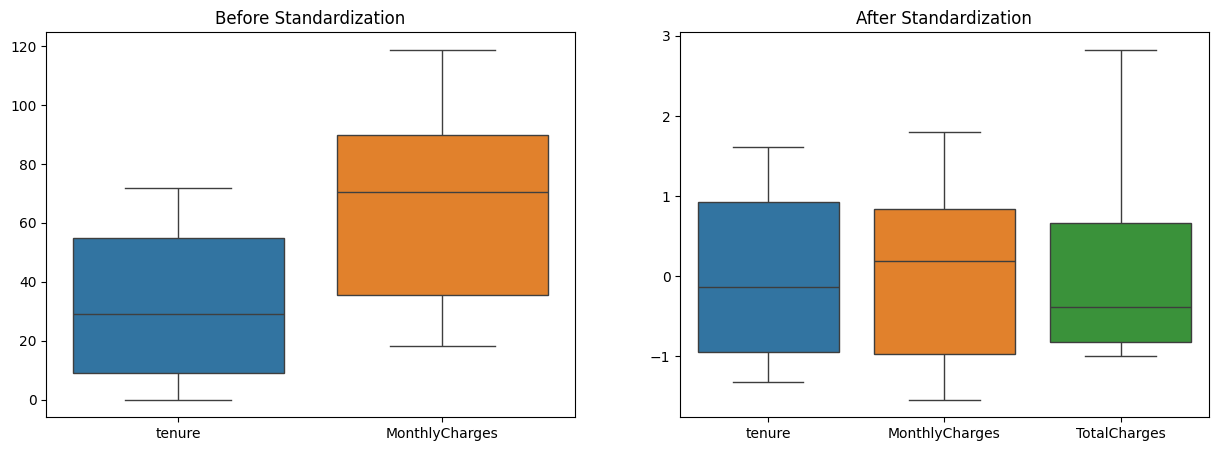

In [6]:
#plot effects of standardization
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df_original[['tenure','MonthlyCharges','TotalCharges']])
plt.title('Before Standardization')
plt.subplot(1,2,2)
sns.boxplot(df[['tenure','MonthlyCharges','TotalCharges']])
plt.title('After Standardization')


In [7]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175588,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253935,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375063,-0.195525


<Axes: >

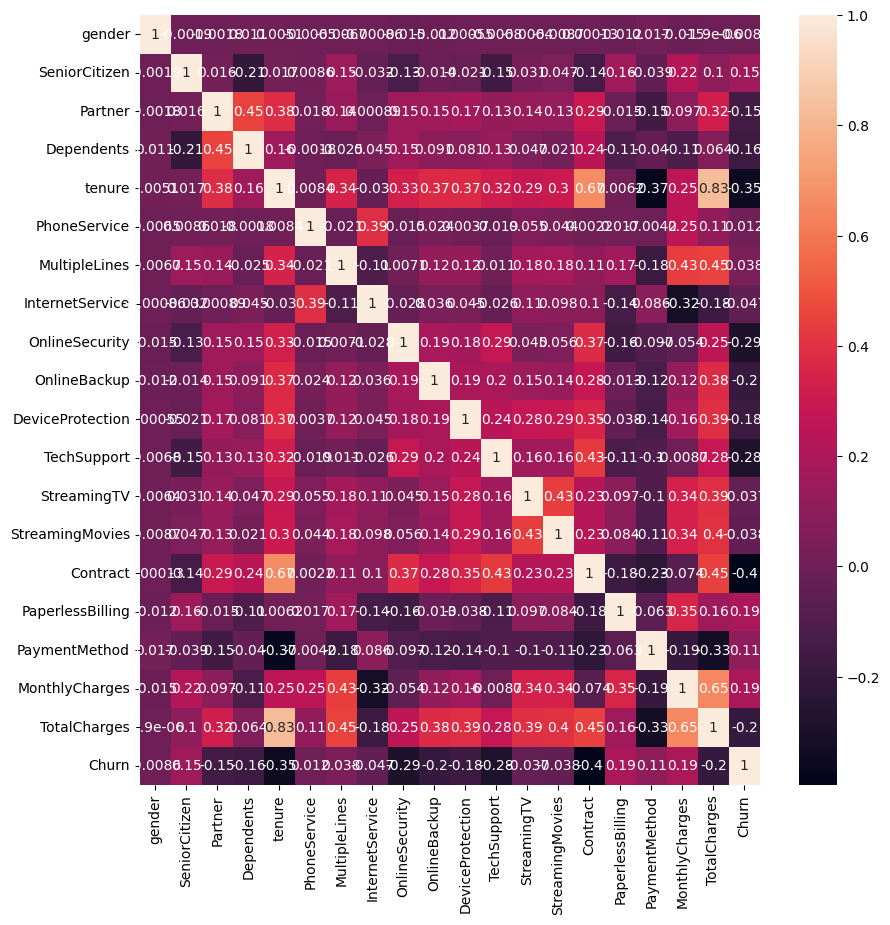

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
#plt.savefig('heatmap.png')

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.128655,0
7039,0,0,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.243151,0
7040,0,0,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.854469,0
7041,1,1,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.872062,1


In [9]:
from imblearn.over_sampling import SMOTE

oversample=SMOTE(sampling_strategy='minority')

X_smote,y_smote=oversample.fit_resample(df[['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod','tenure','MonthlyCharges','TotalCharges']],df['Churn'])

In [10]:
X_smote.shape
y_smote.shape

(10348,)

In [ ]:
X_smote.head(2)

,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,2,0,0,0,0,0,2,-1.277445,-1.160323,-0.994242
1,1,0,0,2,0,2,0,0,0,1,3,0.066327,-0.259629,-0.173244


In [ ]:
len(y_smote[y_smote==1])
len(y_smote[y_smote==0])

5174

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
y_smote.value_counts()

,count
Churn,
0,5174
1,5174


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

In [21]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
name = 'Random Forest'

In [22]:
y_pred = rfc.predict(X_test)
print(f'{name} Results:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('-' * 50)

Random Forest Results:
Accuracy: 0.8341708542713567
Confusion Matrix:
 [[1054  244]
 [ 185 1104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1298
           1       0.82      0.86      0.84      1289

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587

--------------------------------------------------


In [17]:
X_train.columns

Index(['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [15]:
rfc.feature_importances_

array([0.02438244, 0.0212886 , 0.02580452, 0.03956748, 0.02904577,
       0.02191859, 0.05662923, 0.01676029, 0.0154745 , 0.15654669,
       0.05010433, 0.17982527, 0.18520733, 0.17744495])

In [19]:
import pickle
pickle.dump(rfc,open('RandomForest.pkl','wb'))
#

In [24]:
X_train.columns

Index(['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')